Topic 3 : Understanding the Formation of the Spectra in a Bright Point
---
---

# Objectives
---
To understand how the spectra depend on the structure of the atmosphere. 

# Principles
---
Bright points appear brighter than the average quiet atmosphere at many wavelengths. The contrast is the highest in the inner wings of the H$\alpha$ line and the Ca II line. Why does a bright point look different from the average atmosphere? To find an answer, we think of two hypotheses.

1. **It is because bright points are hotter.** This effect can be modelled by multiplying $T$ by a constant factor $c$ greater than 1.
2. **It is because bright points are evacuated.** The structure of temperature given as a function of height is the same as the average atmosphere. But the spectral formation region of a bright point is located lower and hotter than that of the average quiet atmosphere because the bright point is optically more transparent than the average atmosphere.
The effect of evacuation can be modeled by decreasing the absorption coefficient or choosing the deeper region of the average atmospheric model $\tau_\lambda = c$ or $\tau_r = c$ for with $c > 1$.

# Demo.py
---
We use `demo.py` for this project II.
```
"""
"""

from __future__ import absolute_import, division
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from fisspy.read import FISS

__author__= "Juhyeong Kang"
__email__ = "jhkang@astro.snu.ac.kr"

readModel = False
readFISS = False
plotFISS =True
dirn = r'D:\TA\181004\lab2_new'
x = 87
y = 60

if readModel:
    # Read the FAL model 

    modelFile = join(dirn,'falc.dat')
    model = np.loadtxt(modelFile)
    h = model[:,0]
    tau500 = model[:,1]
    m = model[:,2]
    T = model[:,3]
    nel = model[:,7]

    # Plot the model
    fig, ax = plt.subplots(2,2, figsize=[8,6])
    ax[0,0].plot(h, T, 'k')
    ax[0,0].set_xlabel('Height [km]')
    ax[0,0].set_ylabel('T [K]')
    ax[0,0].set_xlim(-100, 1500)
    ax[0,0].set_ylim(4e3, 1e4)
    
    ax[0,1].plot(h, tau500, 'k')
    ax[0,1].set_xlabel('Height [km]')
    ax[0,1].set_ylabel(r'$\tau_{500}$')
    ax[0,1].set_xlim(-100, 1500)
    ax[0,1].set_ylim(1e-6, 1e2)
    ax[0,1].set_yscale('log')
    
    ax[1,0].plot(tau500, T, 'k')
    ax[1,0].set_xlabel(r'$\tau_{500}$')
    ax[1,0].set_ylabel('T [K]')
    ax[1,0].set_xlim(1e2, 1e-6)
    ax[1,0].set_ylim(4e3, 1e4)
    ax[1,0].set_xscale('log')
    
    ax[1,1].plot(h, nel, 'k')
    ax[1,1].set_xlabel('Height [km]')
    ax[1,1].set_ylabel(r'$n_e [cm^{-3}$]')
    ax[1,1].set_xlim(-100, 1500)
    ax[1,1].set_yscale('log')
    
    fig.tight_layout()
    plt.show()

if readFISS:    
    # Read FISS file
    fa = join(dirn, 'FISS_20130717_191246_A1_c.fts') 
    fb = join(dirn, 'FISS_20130717_191246_B1_c.fts')
    
    ha = FISS(fa)
    ca = FISS(fb)
    hw_ha = 0.5
    hw_ca = 0.2
    
    #Calculate the lambdameter(doppler shift)
    shiftHa, intenHa = ha.lambdaMeter(hw_ha,
                                      wvRange=[ha.wvRef-1.2, ha.wvRef + 1.2])
    shiftCa, intenCa = ca.lambdaMeter(hw_ca,
                                      wvRange=[ha.wvRef-1.2, ca.wvRef + 1.2])
    
    #Get raster images
    rasterHa = ha.getRaster(ha.wvRef + np.array([0, 0.6, 1, 4.5]))
    rasterCa = ca.getRaster(ca.wvRef + np.array([0, 0.6, 2, 5.5]))
    
if plotFISS:
    delx = 1
    dely = 5
    
    #Display the spectrogram
    ha.showSpectrogram(x)
    plt.hlines(y, -0.5, ha.nwv-0.5, colors='r', linestyles='dashed')
    ca.showSpectrogram(x+delx)
    plt.hlines(y+dely, -0.5, ca.nwv-0.5, colors='r', linestyles='dashed')
    
    #Display Ha profile
    fig_profile, ax_profile = plt.subplots(2, 1, figsize=(7,8))
    ax_profile[0].plot(ha.wv, ha.refProfile, 'b')
    ax_profile[0].plot(ha.wv, ha.frame[y,x], 'k')
    ax_profile[0].hlines(intenHa[y,x], shiftHa[y,x] - hw_ha,
                          shiftHa[y,x] + hw_ha, 'r')
    ax_profile[0].vlines(shiftHa[y,x], 0, intenHa[y,x], 'r')
    ax_profile[0].set_xlim(ha.wv.min(), ha.wv.max())
    ax_profile[0].set_ylim(0, 1.5e4)
    ax_profile[0].set_xlabel(r'Wavelength [$\AA$]')
    ax_profile[0].set_ylabel('Intensity [count]')
    ax_profile[0].set_title(r'H$\alpha$')
    
    #Display Ca Profile
    ax_profile[1].plot(ca.wv, ca.refProfile, 'b')
    ax_profile[1].plot(ca.wv, ca.frame[y+dely,x+delx], 'k')
    ax_profile[1].hlines(intenCa[y+dely,x+delx],
                          shiftCa[y+dely,x+delx] - hw_ca,
                          shiftCa[y+dely,x+delx] + hw_ca, 'r')
    ax_profile[1].vlines(shiftCa[y+dely,x+delx], 0,
                          intenCa[y+dely,x+delx], 'r')
    ax_profile[1].set_xlim(ca.wv.min(), ca.wv.max())
    ax_profile[1].set_ylim(0, 1.5e4)
    ax_profile[1].set_xlabel(r'Wavelength [$\AA$]')
    ax_profile[1].set_ylabel('Intensity [count]')
    ax_profile[1].set_title(r'Ca II 8542 $\AA$')
    
    fig_profile.tight_layout()
    plt.show()
    
    #Dislpay the Ha raster images
    figRasterHa, axRasterHa = plt.subplots(2, 2,
                                           sharex= True, sharey= True,
                                           figsize= [8,8])
    axRasterHa[0,0].imshow(ha.raster[0], ha.cm, origin= 'lower')
    axRasterHa[0,1].imshow(ha.raster[1], ha.cm, origin= 'lower')
    axRasterHa[1,0].imshow(ha.raster[2], ha.cm, origin= 'lower')
    axRasterHa[1,1].imshow(ha.raster[3], ha.cm, origin= 'lower')
    axRasterHa[0,0].tick_params(labelleft=False)
    axRasterHa[1,1].tick_params(labelbottom=False)
    axRasterHa[1,0].set_xlabel('X [pix]')
    axRasterHa[1,0].set_ylabel('Y [pix]')
    
    for i in range(2):
        for axi in axRasterHa[i]:
            axi.hlines(y, -0.5, ha.nx - 0.5, 'k', linestyles='dotted')
            axi.vlines(x, -0.5, ha.ny - 0.5, 'k', linestyles='dotted')
    figRasterHa.tight_layout(pad=0.1)
    
    #Dislpay the Ca raster images
    figRasterCa, axRasterCa = plt.subplots(2, 2,
                                           sharex= True, sharey= True,
                                           figsize= [8,8])
    axRasterCa[0,0].imshow(ca.raster[0], ca.cm, origin= 'lower')
    axRasterCa[0,1].imshow(ca.raster[1], ca.cm, origin= 'lower')
    axRasterCa[1,0].imshow(ca.raster[2], ca.cm, origin= 'lower')
    axRasterCa[1,1].imshow(ca.raster[3], ca.cm, origin= 'lower')
    axRasterCa[0,0].tick_params(labelleft=False)
    axRasterCa[1,1].tick_params(labelbottom=False)
    axRasterCa[1,0].set_xlabel('X [pix]')
    axRasterCa[1,0].set_ylabel('Y [pix]')
    
    for i in range(2):
        for axi in axRasterCa[i]:
            axi.hlines(y+dely, -0.5, ca.nx - 0.5, 'k', linestyles='dotted')
            axi.vlines(x+delx, -0.5, ca.ny - 0.5, 'k', linestyles='dotted')
    figRasterCa.tight_layout(pad=0.1)
```

# Procedures
---
The following procedures can be taken for either of the H$\alpha$ band data set and the Ca II
band data set.
* Test of the second hypothesis.
    1. Guess a value of $c$.
    2. Determine the temperature of the formation region using the relation $T^*_1(\lambda) = T(c\tau_r(\lambda))$ where $T(t_r)$ is the run of temperature in the average quiet atmosphere.
    3. Calculate $B_\lambda(T^*_1(\lambda))$ and compare it with the observed profile of the bright point.
    4. Repeat the above processes until the best agreement is obtained.
* Based on the results, discuss together how the difference between the two spectral profiles can be understood.

* Run `demo.py` and compare the spectral profiles between the average quiet atmosphere and the bright point at (87,60).

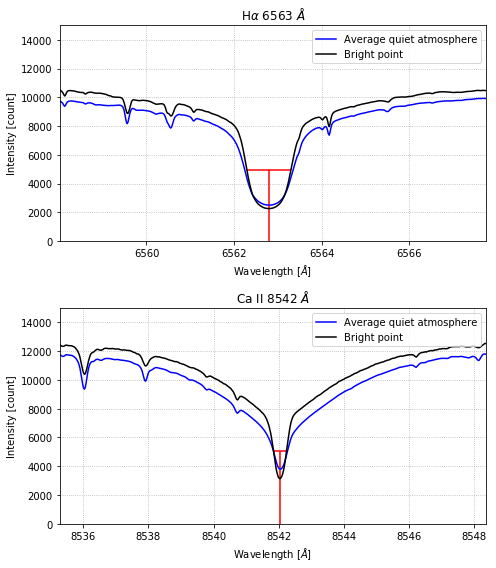

In [11]:
from __future__ import absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join
from fisspy.read import FISS

readFISS = True
plotFISS = True
dirn = os.getcwd()
x = 87
y = 60

if readFISS:
    # Read FISS file
    fa = join(dirn, 'FISS_20130717_191246_A1_c.fts') 
    fb = join(dirn, 'FISS_20130717_191246_B1_c.fts')
    
    ha = FISS(fa)
    ca = FISS(fb)
    hw_ha = 0.5
    hw_ca = 0.2
    
    #Calculate the lambdameter(doppler shift)
    shiftHa, intenHa = ha.lambdaMeter(hw_ha,
                                      wvRange=[ha.wvRef-1.2, ha.wvRef + 1.2])
    shiftCa, intenCa = ca.lambdaMeter(hw_ca,
                                      wvRange=[ha.wvRef-1.2, ca.wvRef + 1.2])
    
    #Get raster images
    rasterHa = ha.getRaster(ha.wvRef + np.array([0, 0.6, 1, 4.5]))
    rasterCa = ca.getRaster(ca.wvRef + np.array([0, 0.6, 2, 5.5]))
    
if plotFISS:
    delx = 1
    dely = 5
    
    #Display Ha profile
    fig_profile, ax_profile = plt.subplots(2, 1, figsize=(7,8))
    ax_profile[0].plot(ha.wv, ha.refProfile, 'b', label='Average quiet atmosphere')
    ax_profile[0].plot(ha.wv, ha.frame[y,x], 'k', label='Bright point')
    ax_profile[0].hlines(intenHa[y,x], shiftHa[y,x] - hw_ha,
                          shiftHa[y,x] + hw_ha, 'r')
    ax_profile[0].vlines(shiftHa[y,x], 0, intenHa[y,x], 'r')
    ax_profile[0].set_xlim(ha.wv.min(), ha.wv.max())
    ax_profile[0].set_ylim(0, 1.5e4)
    ax_profile[0].set_xlabel(r'Wavelength [$\AA$]')
    ax_profile[0].set_ylabel('Intensity [count]')
    ax_profile[0].set_title(r'H$\alpha$ 6563 $\AA$')
    ax_profile[0].grid(ls=':')
    ax_profile[0].legend()
    
    #Display CaII Profile
    ax_profile[1].plot(ca.wv, ca.refProfile, 'b', label='Average quiet atmosphere')
    ax_profile[1].plot(ca.wv, ca.frame[y+dely,x+delx], 'k', label='Bright point')
    ax_profile[1].hlines(intenCa[y+dely,x+delx],
                          shiftCa[y+dely,x+delx] - hw_ca,
                          shiftCa[y+dely,x+delx] + hw_ca, 'r')
    ax_profile[1].vlines(shiftCa[y+dely,x+delx], 0,
                          intenCa[y+dely,x+delx], 'r')
    ax_profile[1].set_xlim(ca.wv.min(), ca.wv.max())
    ax_profile[1].set_ylim(0, 1.5e4)
    ax_profile[1].set_xlabel(r'Wavelength [$\AA$]')
    ax_profile[1].set_ylabel('Intensity [count]')
    ax_profile[1].set_title(r'Ca II 8542 $\AA$')
    ax_profile[1].grid(ls=':')
    ax_profile[1].legend()
    
    fig_profile.tight_layout()
    plt.show()

core 부분에서 average quiet atmosphere 보다 intensity 가 낮지만 그 이외의 부분에서는 intenstiy 가 높다. 

* Use the results obtained for the average quiet atmosphere from the previous topic: $T_1(\lambda)$ and $\tau_r(\lambda)$.

* Test of the first hypothesis.
    1. Guess a value of $c$.
    2. Calculate $B_\lambda(cT_1(\lambda))$ and compare it with the observed profile of the bright point.
    3. Repeat the above processes until the best agreement is obtained.